In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Данные

In [8]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


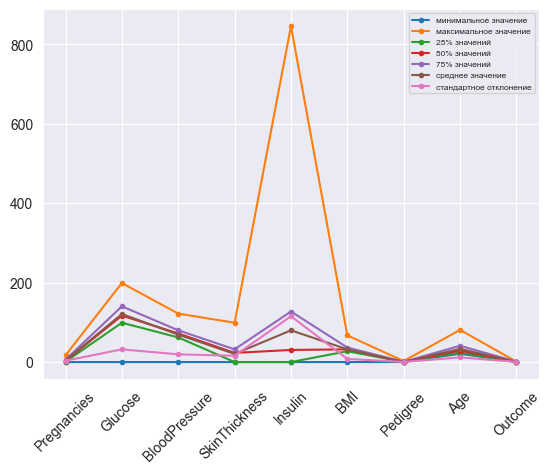

In [9]:
def visualization(vizual_data):
    statistic = vizual_data.describe()
    # Выбор нужных статистик
    mean_values = statistic.loc['mean']
    std_values = statistic.loc['std']
    count_values = statistic.loc['count']
    min_values = statistic.loc['min']
    quarter_values = statistic.loc['25%']
    half_values = statistic.loc['50%']
    three_quarters_values = statistic.loc['75%']
    max_values = statistic.loc['max']
    
    value_array = [min_values, max_values, quarter_values, half_values, three_quarters_values, mean_values, std_values]
    graf_names = ['минимальное значение', 'максимальное значение',
                  '25% значений', '50% значений',
                  '75% значений', 'среднее значение',
                  'стандартное отклонение']
    for i in value_array:
        plt.plot(i, marker='.')
    plt.legend(graf_names, prop = { "size": 6 })
    plt.xticks(rotation=45)
    plt.show()
visualization(data)

### Предварительная обработка данных

+ Данные равные 0 заменили средними значениями по столбцу
+ Для масштабирования используем стандартный скейлер

In [10]:
# Обработка отсутствующих значений
data['Pregnancies'] = data['Pregnancies'].replace(0, np.nan)
data['Glucose'] = data['Glucose'].replace(0, np.nan)
data['BloodPressure'] = data['BloodPressure'].replace(0, np.nan)
data['SkinThickness'] = data['SkinThickness'].replace(0, np.nan)
data['Insulin'] = data['Insulin'].replace(0, np.nan)
data['BMI'] = data['BMI'].replace(0, np.nan)
data['Pedigree'] = data['Pedigree'].replace(0, np.nan)
data['Age'] = data['Age'].replace(0, np.nan)
# Заполняем пустые значения средними значениями по столбцу
data.fillna(data.mean(), inplace=True)

# Масштабирование данных
scaler = StandardScaler()
scaled_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,5.062549e-01,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-1.175289e+00,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.178873e+00,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-1.175289e+00,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,2.987023e-16,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.851490e+00,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,0
764,-8.389806e-01,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023,0
765,1.699460e-01,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,0
766,-1.175289e+00,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732,1


### Визуализация статистики по датасету

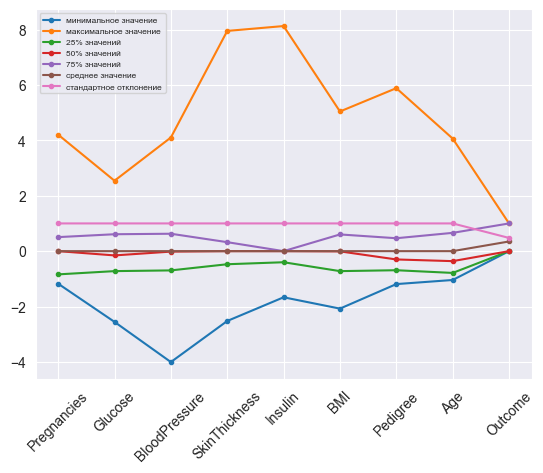

In [11]:
visualization(data)

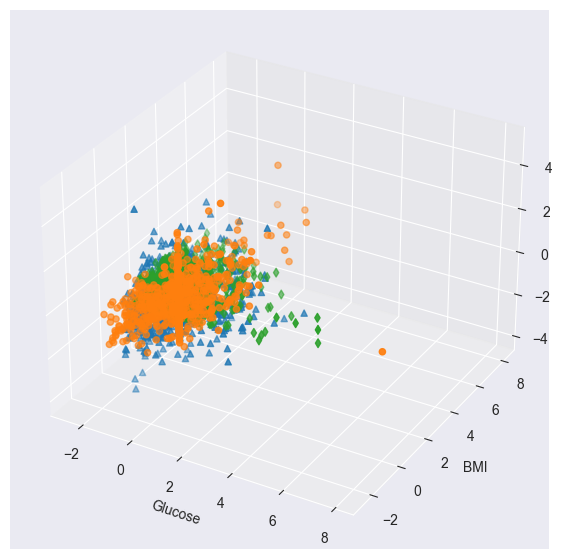

In [12]:
# Создание 3D-области для визуализации
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Построение 3D-графика случайными признаками
ax.scatter(data['Pregnancies'], data['Glucose'], data['BloodPressure'], marker='^')
ax.scatter(data['SkinThickness'], data['Insulin'], data['BMI'], marker='o')
ax.scatter(data['Pedigree'], data['Age'], data['Outcome'], marker='d')

# Настройка подписей осей
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')

# Показать график
plt.show()


### Метод KNN

Заключается в том, что у искомой точки находятся самые ближайшие соседи по разности характеристик. Смотрится итоговое значение соседей, искомому случаю присваивается значение большинства.
Для подсчета расстояний мы будем использовать Евклидово расстояние, так-как оно самое распространенное.
    $$ 
	d(a,b)=\sqrt{\sum_{i=1}^n(a_i-b_i)^2}
	$$
	
В нашем случае мы будем смотреть на случайные характеристики датасета и определять, есть диабет или нет. Решаем задачу классификации.

**Алгоритм:**
1. Считаем расстояния между искомой точкой и всеми остальными (```distance(point1, point2)```)
2. Сортируем список расстояний 
3. Извлекаем класс K ближайших соседей из сортированного списка
4. Определяем преобладающий класс

In [13]:
X_data = np.array([
    [46, 40],
    [36, 54],
    [34, 29],
    [38, 23],
    [10, 12],
    [0, 18],
    [12, 5]
])
X_classification = np.array([
    [1],
    [0],
    [1],
    [1],
    [0],
    [0],
    [0]
])

y = np.array([
    [40, 40], 
    [39, 45],
    [1, 3],
    [20, 10],
    [22, 12]
])

# Евклидово расстояние между двумя точками
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))
import math
# X - признаки
# Y - классы для X
# x - признаки искомого
# K - кол-во соседей.
# Возвращает массив классов большинства соседей для конкретного случая
def neighbors(X_data, X_classification, y, K=3):
    # проходимся по каждому случаю, для которого находим соседей и класс
    predictions = np.zeros((len(y), 1))
    for j in range(len(y)):
        Y = y[j]
        dist = []
        # Считаем расстояния между искомой точкой и остальными
        for i in range(len(X_data)):
            dist.append((distance(X_data[i], Y), X_classification[i]))
            
        # Сортируем по расстояниям
        dist = sorted(dist, key=lambda x: x[0])
            
        # Извлекаем классы K ближайших соседей
        nearest_classes = [d[1] for d in dist[:K]]
            
        # Преобразуем nearest_classes в одномерный массив
        nearest_classes = np.array(nearest_classes).flatten()
        # Определяем класс по большинству
        predicted_class = round(sum(nearest_classes) / len(nearest_classes))
        
        predictions[j, 0] = predicted_class            
    return predictions

print(neighbors(X_data, X_classification, y, K=3))

[[1.]
 [1.]
 [0.]
 [0.]
 [0.]]


### Разделение данных на обучающие и тестовые

In [14]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Оценим важность признаков для повышения производительности

In [15]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Оценка важности с помощью Random Forest
model = RandomForestClassifier()
model.fit(X, y)

# Вывод важности признаков
importance = model.feature_importances_
for i, col in enumerate(X.columns):
    print(f"Признак: {col}, Важность: {importance[i]}")

# Использование RFE для выбора признаков
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)
print("Признаки, выбранные RFE:", fit.support_)

Признак: Pregnancies, Важность: 0.08117032097684167
Признак: Glucose, Важность: 0.25292157291348394
Признак: BloodPressure, Важность: 0.08030300998182195
Признак: SkinThickness, Важность: 0.07207010147747678
Признак: Insulin, Важность: 0.09017533967367232
Признак: BMI, Важность: 0.1632750667347599
Признак: Pedigree, Важность: 0.125126649315555
Признак: Age, Важность: 0.1349579389263886
Признаки, выбранные RFE: [False  True False False  True  True  True  True]


### Создание двух моделей

1. Признаки выбираются случайно
2. Все признаки
3. Glucose, Insulin, BMI, Pedigree, Age

['Insulin' 'SkinThickness' 'Pedigree']
Матрица ошибок для Model 1:

При k=3
[[70 29]
 [33 22]]
Правильных классификаций: 92
Неправильных классификаций: 62
Процент правильных ответов: 59.74025974025974


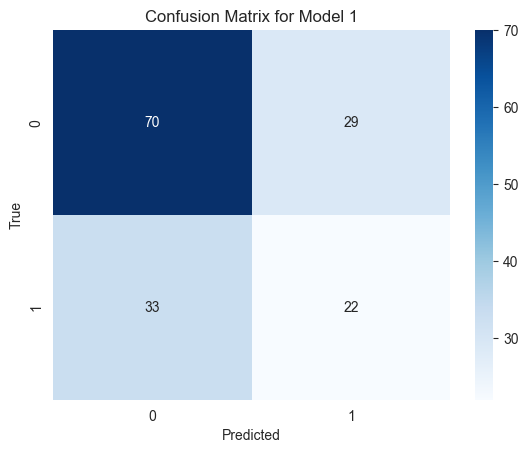

При k=5
[[64 35]
 [27 28]]
Правильных классификаций: 92
Неправильных классификаций: 62
Процент правильных ответов: 59.74025974025974


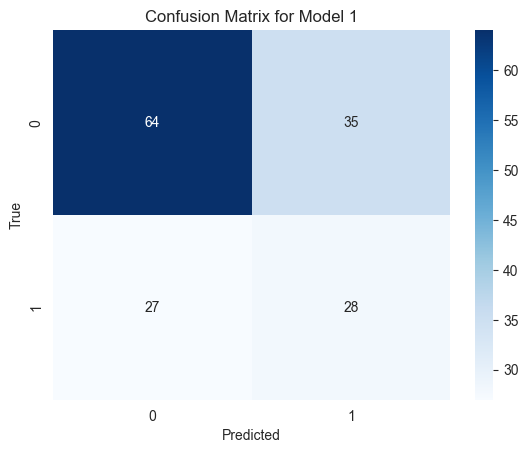

При k=10
[[78 21]
 [37 18]]
Правильных классификаций: 96
Неправильных классификаций: 58
Процент правильных ответов: 62.33766233766234


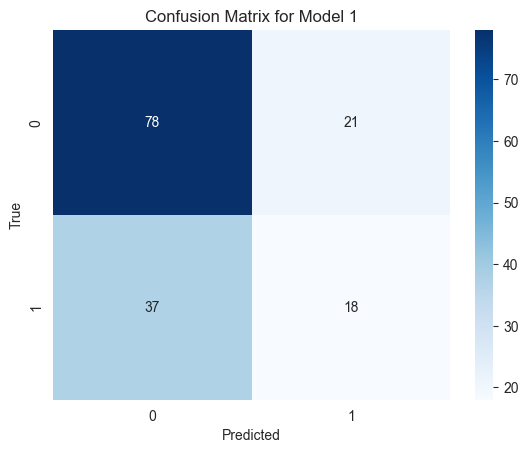

Матрица ошибок для Model 2:

При k=3
[[72 27]
 [17 38]]
Правильных классификаций: 110
Неправильных классификаций: 44
Процент правильных ответов: 71.42857142857143


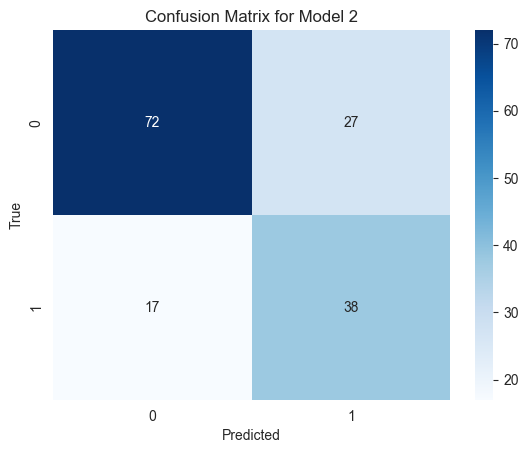

При k=5
[[72 27]
 [18 37]]
Правильных классификаций: 109
Неправильных классификаций: 45
Процент правильных ответов: 70.77922077922078


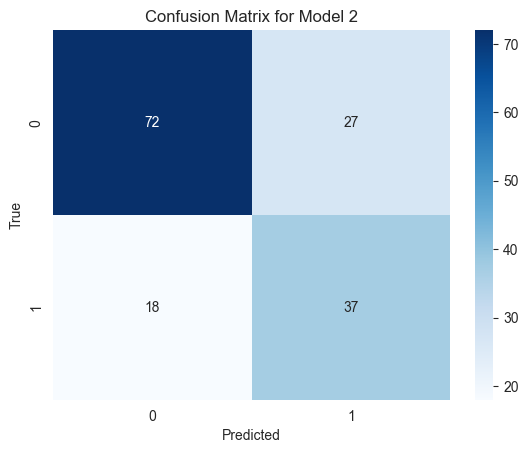

При k=10
[[80 19]
 [20 35]]
Правильных классификаций: 115
Неправильных классификаций: 39
Процент правильных ответов: 74.67532467532467


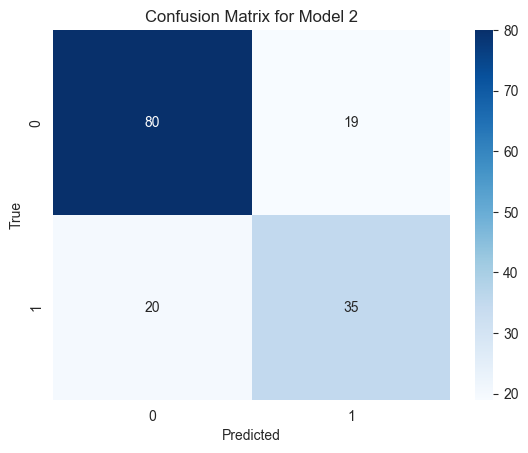

Матрица ошибок для Model 3:

При k=3
[[71 28]
 [20 35]]
Правильных классификаций: 106
Неправильных классификаций: 48
Процент правильных ответов: 68.83116883116882


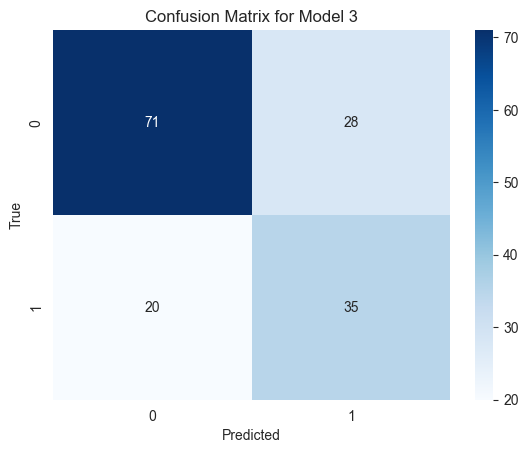

При k=5
[[77 22]
 [18 37]]
Правильных классификаций: 114
Неправильных классификаций: 40
Процент правильных ответов: 74.02597402597402


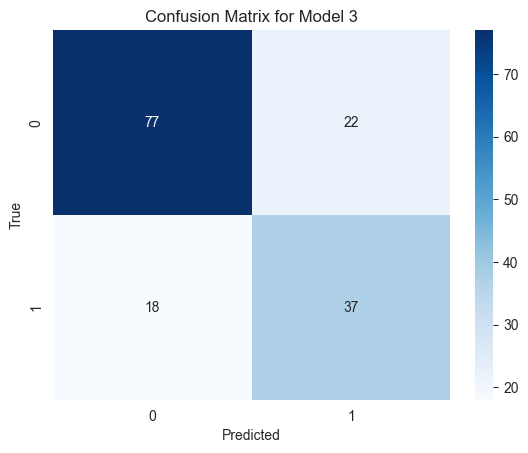

При k=10
[[81 18]
 [21 34]]
Правильных классификаций: 115
Неправильных классификаций: 39
Процент правильных ответов: 74.67532467532467


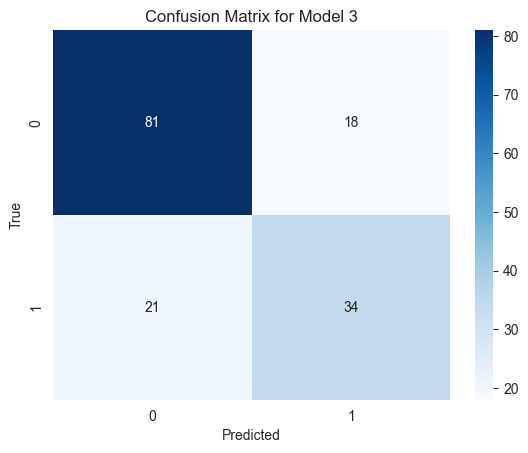

In [17]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age']

# Модель 1 (Признаки выбираются случайно)
count_of_columns = random.randint(2, len(columns) - 1)
model_columns = np.random.choice(columns, size=count_of_columns, replace=False)
X1 = X_train[model_columns]
X1_test = X_test[model_columns]
print(model_columns)

# Модель 2 (Все признаки)
X2 = X_train
X2_test = X_test

# Модель 3
X3 = X_train[['Glucose', 'Insulin', 'BMI', 'Pedigree', 'Age']]
X3_test = X_test[['Glucose', 'Insulin', 'BMI', 'Pedigree', 'Age']]

models = {'Model 1': X1, 'Model 2': X2, 'Model 3': X3}
tests = [X1_test, X2_test, X3_test]
scores = {}

index = 0
for model_name, X_model in models.items():
    # Классификация тестового набора на основе обучающего набора 
    # Предсказанные значения 
    k_arr = [3, 5, 10]
    print(f"Матрица ошибок для {model_name}:\n")
    for i in k_arr:
        print(f"При k={i}")
        predictions = neighbors(X_model.values, y_train.values, tests[index].values, i)
        
        # print(f"Матрица ошибок для {model_name}:")
    
        # Построение матрицы ошибок
        cm = confusion_matrix(y_test.values, predictions)
        print(cm)
        right_class = cm[0][0] + cm[1][1]
        wrong_class = cm[0][1] + cm[1][0]
        print(f"Правильных классификаций: {right_class}")
        print(f"Неправильных классификаций: {wrong_class}")
        print(f"Процент правильных ответов: {100 / (right_class + wrong_class) * right_class}")
        
        # визуализация матрицы
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix for {model_name}")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        
    index += 1